


# Gradient Boosting Algorithm

It is an ensemble technique that combines the predictions of multiple weak learners, *typically decision trees*, sequentially.

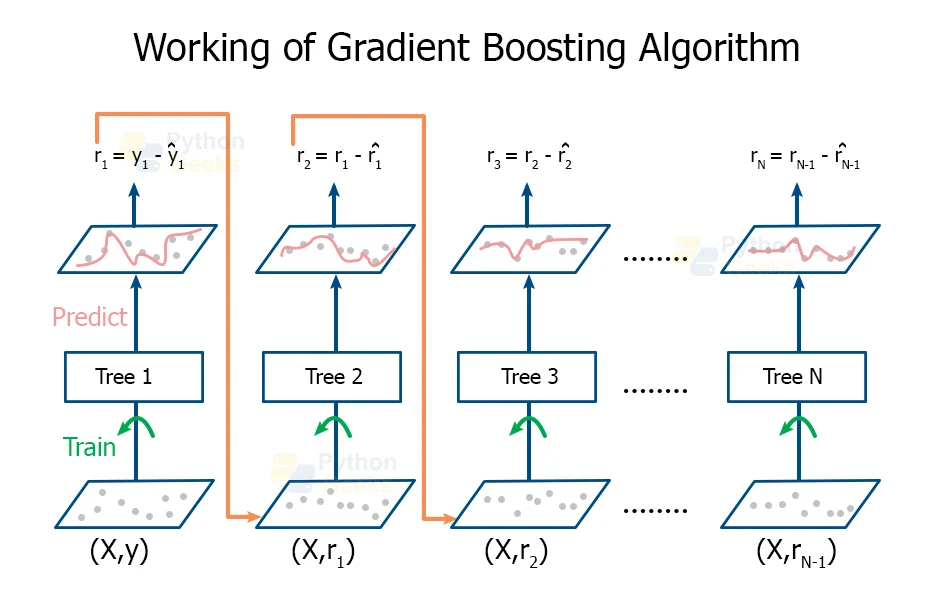

 It is a powerful algorithm to find any nonlinear relationship between input and target.

 ### Advantages of Gradient Boosting

 * Robustness to Missing Values and Outliers

 * Effective Handling of High Cardinality Categorical Features


----


Gradient Boosting is a machine learning technique used for classification and regression tasks.


This article aims to provide you with all the details about Gradient Boosting Regressor algorithm, including Python code from scratch.

## Implementing Gradient Boost Regressor in Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Let's build a polynomial data that will represent this equation: **y = 0.5x^2 + 0**.9x + 2

### **Generating synthetic data with a Quadratic relationship using NumPy and randomness**

In [ ]:
# X values randomly generated in the range [-3, 3]
X = 6 * np.random.rand(200, 1) - 3

# Creating a quadratic relationship in the data with some noise
y = 0.5 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

Let's plot our generated data.

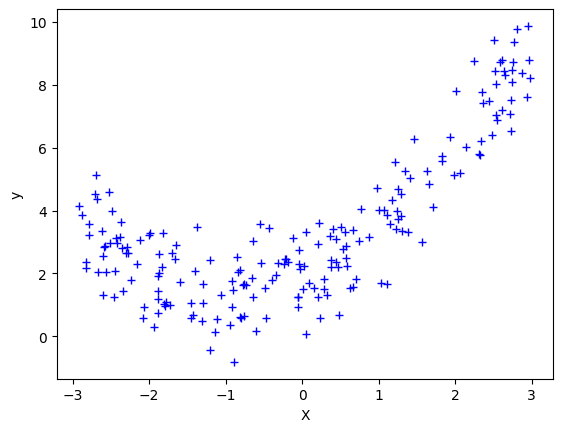

In [ ]:
plt.plot(X, y,'b+')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
import pandas as pd

In [ ]:
# Combine X and y arrays into a single DataFrame
df = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Display the first few rows of the DataFrame
print(df.head())

          X         y
0 -1.592798  1.708897
1  2.728114  7.508357
2  1.459935  6.287942
3 -2.709505  4.521559
4  1.307548  3.333105


## Train test split


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(df['X'].values.reshape(-1, 1), df['y'].values, test_size=0.2, random_state=0)

In [ ]:
print(train_input.shape)
print(train_target.shape)

(160, 1)
(160,)


In [ ]:
train_input

In [ ]:
from sklearn.tree import DecisionTreeRegressor

## Building our own Gradient Boosting Regressor

1. **Initialization**:

* Initialize the Gradient Boosting Regressor with parameters such as the number of estimators (trees), learning rate, and maximum depth of each decision tree.
* Initialize an empty list to store the decision trees (dts) that will form the ensemble.

2. **Training (fitting)**:

* Initially, set the first prediction (F0) as the mean of the target column.
* For each estimator (decision tree):
    * Calculate the residual, which represents the difference between the actual target values and the current ensemble prediction.
    * Train a decision tree regressor to predict these residuals, with a maximum depth specified.
    * Get the predictions (gamma) of this new decision tree on the training inputs.
    * Update the ensemble predictions by adding the predictions of this tree, scaled by the learning rate.
    * Store the trained decision tree in the list of decision trees.

3. **Prediction**:

* To make predictions:
  * Initialize the predictions with the initial prediction value (F0), which is the mean of the target column.
  * For each decision tree in the ensemble:
    * Get the predictions of the decision tree on the test inputs.
    * Scale these predictions by the learning rate.
    * Add these scaled predictions to the current ensemble predictions.
* Return the final predictions.

4. **Interpretation**:

* The algorithm iteratively improves predictions by fitting new decision trees to the residuals of the previous predictions.
* Each decision tree focuses on capturing the errors (residuals) of the ensemble, gradually reducing the overall prediction error.

5. **Ensemble Building**:

* The final prediction is a combination of the predictions made by all the decision trees in the ensemble, each weighted by the learning rate.
* By adding new weak learners (decision trees) to the ensemble and updating the predictions iteratively, the algorithm builds a strong predictive model that can capture complex relationships in the data.

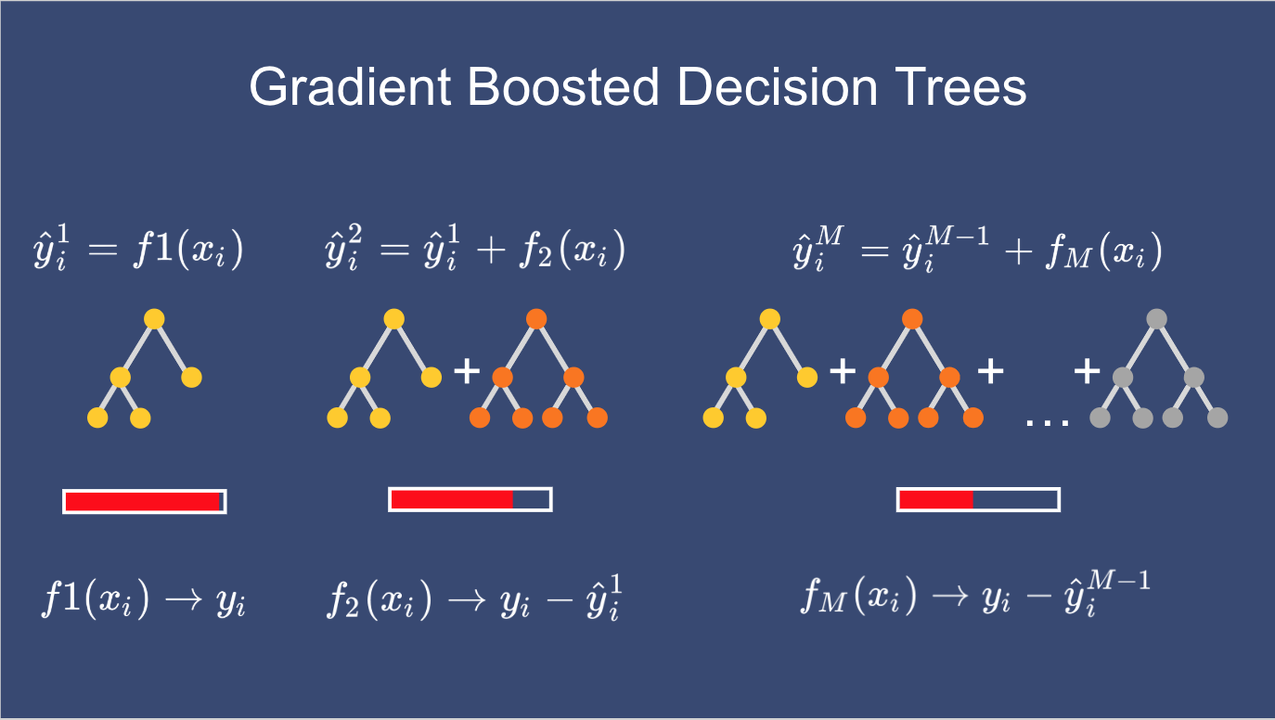

In [ ]:
class GradientBoostingRegressor():

    def __init__(self, n_estimators = 50, learning_rate = 0.1, max_depth = 1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self. max_depth = max_depth
        self.dts = [] # Decision Trees


    def fit(self, train_inputs, train_target):

        # Since we are using Least Square as Loss Function
        # The First Prediction will be the Mean(Target Column)
        self.F0 = train_target.mean()

        # First Model
        Fm = self.F0

        # For each estimator
        for _ in range(self.n_estimators):

            # Calculating residual (pseudo-residuals in case of GB)
            residual = train_target - Fm

            # Fitting Regression Tree
            dt = DecisionTreeRegressor(max_depth = self.max_depth, random_state = 0)
            # we get the same train and test sets across different executions.

            dt.fit(train_inputs, residual)

            # Calculating Gamma - the predictions of the new model
            gamma = dt.predict(train_inputs)

            # Updating Ensemble Predictions
            Fm += self.learning_rate * gamma

            # Storing the trained decision tree
            self.dts.append(dt)


    def predict(self, test_inputs):
       # Initialize predictions with F0 (the mean of the target column)
       predictions = np.full(len(test_inputs), self.F0)

       # Add predictions of each weak learner multiplied by its learning rate
       for dt in self.dts:
           predictions += self.learning_rate * dt.predict(test_inputs)

       return predictions



In [ ]:
bgr = GradientBoostingRegressor(max_depth = 1, n_estimators = 500, learning_rate = 0.1)
bgr.fit(train_input, train_target)

In [ ]:
y_pred = bgr.predict(test_input)

In [ ]:
r2_score(test_target,y_pred)

0.7656349948868615

## Validating the Accuracy

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
sklearn_gbm = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=1
)
sklearn_gbm.fit(train_input, train_target)
y_gbm_pred = sklearn_gbm.predict(test_input)
r2_score(test_target,y_gbm_pred)

0.7656349948868615

As you can see in the output above, both models have exactly the same

## Conclusion

The class that we build, uses the **Least Square Loss Function** (one of the options of gradient boosting algorithm) to solve Regression Problems.

## Difference between Adaboost and Gradient Boosting algorithms

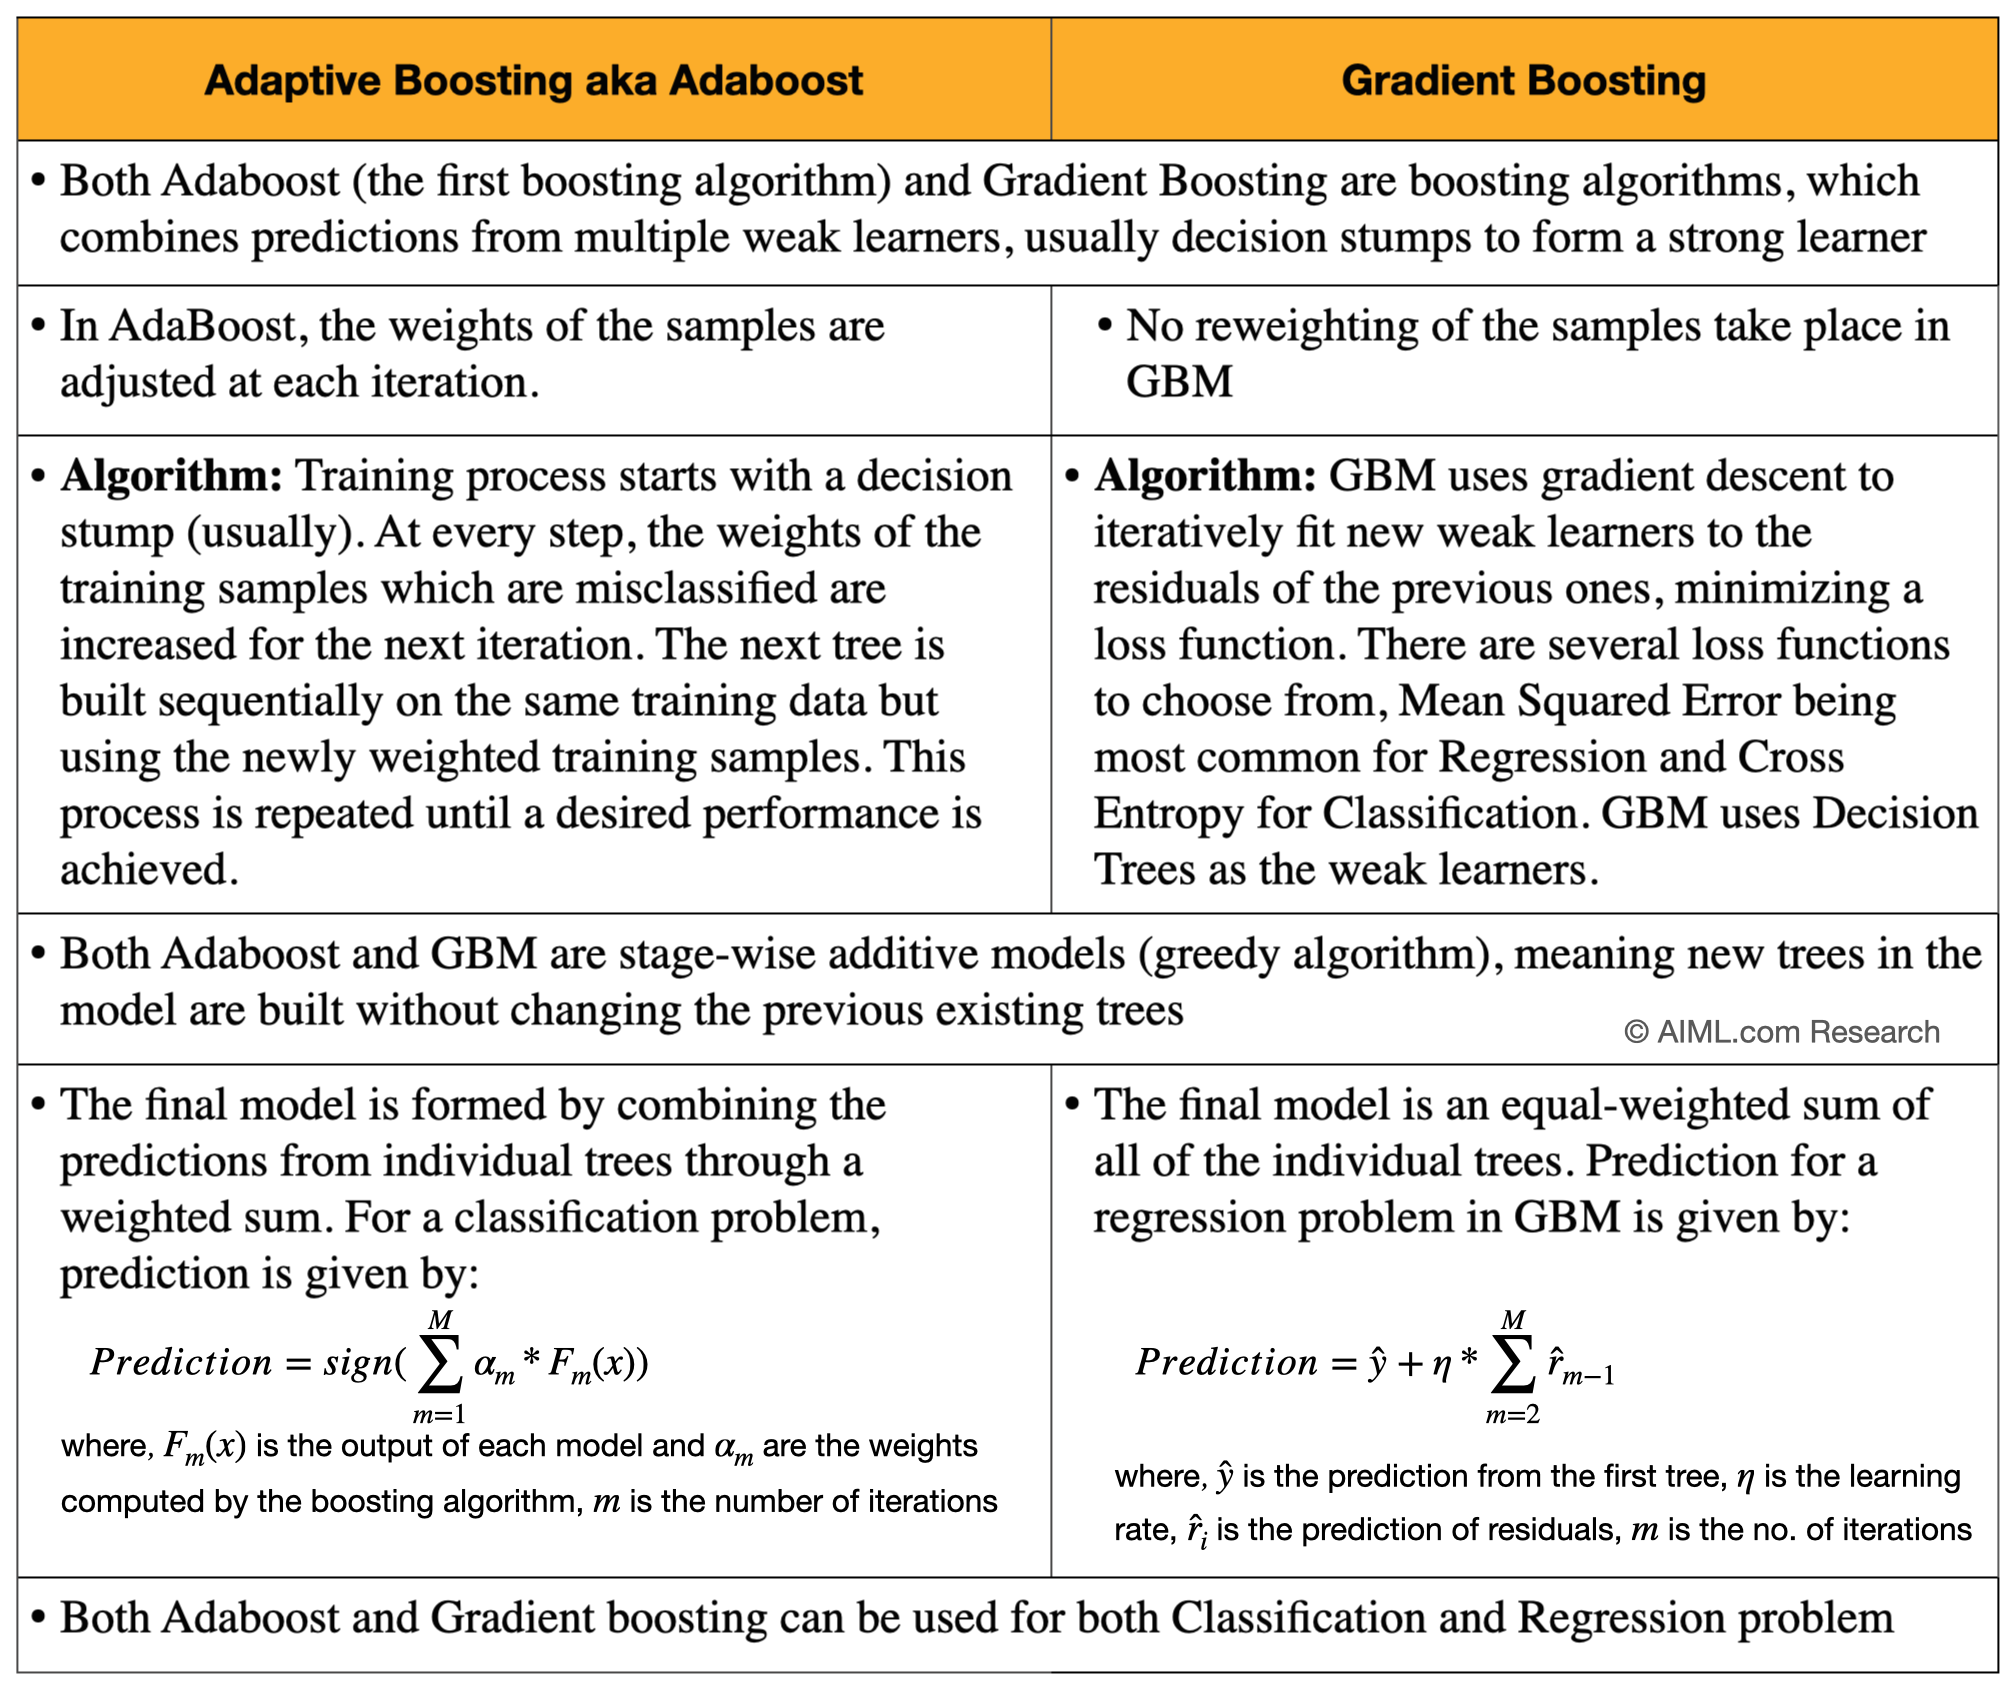

> Stay tuned for Gradient Boosting Classifer Models and Don't forget to **Star** this Github Repository for more such contents and consider **sharing with others**.